# Data understanding

De gebruikte dataset is “Geregistreerde criminaliteit" (https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83648NED/table?fromstatweb). 

De CBS data is een csv bestand, dit staat voor comma seperated values of door comma gescheide waarden in het nederlands.
De data bevat de volgende kolomen:
 - `ID` is de unieke waarde voor elke row.
 - `Soort misdrijf` geeft aan welke om wat voor misdrijf het gaat.
 - `Perioden` geeft de periode aan waarin de misdrijven en aantal misdrijven zijn uitgevoerd.
 - `Regio's` is de regio waarin de genoemde aantal misdrijven in zijn gebeurd.
 - `Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)` is de aantal misdrijven die binnen een provincie/gemeente geregistreerd zijn.
 - `Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)` is de procentuele aantal van de totaal geregistreerde misdrijven.
 - `Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw. (per 1.000 inwoners)` is de aantal misdrijven die binnen een provincie/gemeente geregistreerd zijn per 1.000 inwoners.

## Beschrijven van de data

Hieronder staat een beschrijving van de data vanuit de Centraal Bureau Statistieken. Dit wordt telkens door middel van een stukje code weergegeven. 

In [171]:
import pandas as pd
import geopandas as gpd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from prep import movecol

# Dataset inlezen
file = "../../../raw-data/Veiligheid.csv"
data_veiligheid = pd.read_csv(file, sep=";")

df = pd.DataFrame(data_veiligheid)

# Dataverkennen door dataframe te openen
data_veiligheid



,Soort misdrijf,Perioden,Regio's,Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal),"Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)",Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw. (per 1 000 inwoners)
0,"Misdrijven, totaal",2015,Groningen (PV),30065.0,100.0,"51,5"
1,"Misdrijven, totaal",2016,Groningen (PV),29570.0,100.0,"50,7"
2,"Misdrijven, totaal",2017,Groningen (PV),24990.0,100.0,"42,8"
3,"Misdrijven, totaal",2018*,Groningen (PV),24035.0,100.0,"41,2"
4,"Misdrijven, totaal",2019*,Groningen (PV),24865.0,100.0,"42,6"
...,...,...,...,...,...,...
176995,9.2 Misdrijf (overig),2015,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN
176996,9.2 Misdrijf (overig),2016,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN
176997,9.2 Misdrijf (overig),2017,Niet-gemeentelijk ingedeeld,20.0,1.0,NaN
176998,9.2 Misdrijf (overig),2018*,Niet-gemeentelijk ingedeeld,25.0,1.0,NaN


In [172]:
# Info over de kolommen
info_kolommen_veiligheid = data_veiligheid.info()
info_kolommen_veiligheid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177000 entries, 0 to 176999
Data columns (total 6 columns):
 #   Column                                                                                                  Non-Null Count   Dtype  
---  ------                                                                                                  --------------   -----  
 0   Soort misdrijf                                                                                          177000 non-null  object 
 1   Perioden                                                                                                177000 non-null  object 
 2   Regio's                                                                                                 177000 non-null  object 
 3   Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)                                     148200 non-null  float64
 4   Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal gereg

In [173]:
# Beschrijvende statistieken van de data
beschrijvende_stats_veiligheid = data_veiligheid.describe()
beschrijvende_stats_veiligheid

,Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal),"Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)"
count,148200.000000,148200.000000
mean,219.201113,4.900385
std,2918.560582,14.944102
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5.000000,0.000000
75%,30.000000,2.000000
max,224970.000000,100.000000


In [174]:
# Informatie over de kolomnamen in de Dataframe
data_veiligheid.columns

Index(['Soort misdrijf', 'Perioden', 'Regio's',
       'Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)',
       'Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)',
       'Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)'],
      dtype='object')

In [175]:
# Controleren op nulwaarden in de dataframe
data_veiligheid.isna().sum()

Soort misdrijf                                                                                                0
Perioden                                                                                                      0
Regio's                                                                                                       0
Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)                                       28800
Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)    28800
Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)                   89035
dtype: int64

## Data exploratie

In [176]:
# Pairplot weergave van de data.
#sb.pairplot(data_veiligheid, kind="reg")

In [177]:
# Catplot weergave van de data.
# sb.barplot(x="Perioden", y="Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)", data=data_veiligheid, color="steelblue", errwidth=0)

In [178]:
# Alle soorten misdrijven die er minimaal 1 keer in voorkomen.
soorten_misdrijven = data_veiligheid["Soort misdrijf"].drop_duplicates()
soorten_misdrijven

0                              Misdrijven, totaal
2360                        1 Vermogensmisdrijven
4720        1.1 Diefstal/verduistering en inbraak
7080         1.1.1 Diefstal en inbraak met geweld
9440      1.1.2 Diefstal en inbraak zonder geweld
                           ...                   
165200                 6.3 Drugsmisdrijf (overig)
167560                    7 (Vuur)wapenmisdrijven
169920                9 Misdrijven overige wetten
172280                      9.1 Militair misdrijf
174640                      9.2 Misdrijf (overig)
Name: Soort misdrijf, Length: 75, dtype: object

## Data Preperation

In [179]:
# Kolomnamen van de dataset wijzigen.

data_veiligheid_nieuw = data_veiligheid

data_veiligheid_nieuw.rename(columns={'Soort misdrijf':'Soort_misdrijf','Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)':'Aantal_misdrijven', 'Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)':'Misdrijven_relatief(%)', 'Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)':'Aantal_misdrijven(per_1000_inw)'}, inplace=True)

data_veiligheid_nieuw

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw)
0,"Misdrijven, totaal",2015,Groningen (PV),30065.0,100.0,"51,5"
1,"Misdrijven, totaal",2016,Groningen (PV),29570.0,100.0,"50,7"
2,"Misdrijven, totaal",2017,Groningen (PV),24990.0,100.0,"42,8"
3,"Misdrijven, totaal",2018*,Groningen (PV),24035.0,100.0,"41,2"
4,"Misdrijven, totaal",2019*,Groningen (PV),24865.0,100.0,"42,6"
...,...,...,...,...,...,...
176995,9.2 Misdrijf (overig),2015,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN
176996,9.2 Misdrijf (overig),2016,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN
176997,9.2 Misdrijf (overig),2017,Niet-gemeentelijk ingedeeld,20.0,1.0,NaN
176998,9.2 Misdrijf (overig),2018*,Niet-gemeentelijk ingedeeld,25.0,1.0,NaN


In [180]:
# Controleren op nulwaarden in de dataframe
data_veiligheid_nieuw.isna().sum()

Soort_misdrijf                         0
Perioden                               0
Regio's                                0
Aantal_misdrijven                  28800
Misdrijven_relatief(%)             28800
Aantal_misdrijven(per_1000_inw)    89035
dtype: int64

In [181]:
# Het vervangen van de NA values door een int object
data_veiligheid_nieuw['Misdrijven_relatief(%)'].fillna(value=0, inplace=True)
data_veiligheid_nieuw['Aantal_misdrijven'].fillna(value=0, inplace=True)
data_veiligheid_nieuw['Aantal_misdrijven(per_1000_inw)'].fillna(value=0, inplace=True)

# De waardes zijn vervangen van de NA values door een string object
data_veiligheid_nieuw.isna().sum()

Soort_misdrijf                     0
Perioden                           0
Regio's                            0
Aantal_misdrijven                  0
Misdrijven_relatief(%)             0
Aantal_misdrijven(per_1000_inw)    0
dtype: int64

In [182]:
#nieuwe dataset inladen voor mergen dataset, zodat regio's ook provincie er achter heeft staan.

file = "../../../raw-data/gemeenten-provincie.xlsx"
postcode = pd.read_excel(file) 

#dataframe maken van de dataset
df2 = pd.DataFrame(postcode)

#colom hernoemen
postcode.rename(columns={"Gemeente":"Regio's"}, inplace=True)

#dataframe opnieuw defineren
df2 = pd.DataFrame(postcode)

#mergen van 2 dataset op basis van regio's colomn
data_veiligheid_incl_provincie = data_veiligheid_nieuw.merge(df2, on="Regio's")

data_veiligheid_incl_provincie

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw),Provincie
0,"Misdrijven, totaal",2015,Aa en Hunze,645.0,100.0,"25,6",Drenthe
1,"Misdrijven, totaal",2016,Aa en Hunze,620.0,100.0,"24,6",Drenthe
2,"Misdrijven, totaal",2017,Aa en Hunze,550.0,100.0,"21,7",Drenthe
3,"Misdrijven, totaal",2018*,Aa en Hunze,545.0,100.0,"21,4",Drenthe
4,"Misdrijven, totaal",2019*,Aa en Hunze,665.0,100.0,"26,3",Drenthe
...,...,...,...,...,...,...,...
172120,9.2 Misdrijf (overig),2015,Niet-gemeentelijk ingedeeld,10.0,1.0,0,Overig
172121,9.2 Misdrijf (overig),2016,Niet-gemeentelijk ingedeeld,10.0,1.0,0,Overig
172122,9.2 Misdrijf (overig),2017,Niet-gemeentelijk ingedeeld,20.0,1.0,0,Overig
172123,9.2 Misdrijf (overig),2018*,Niet-gemeentelijk ingedeeld,25.0,1.0,0,Overig


In [194]:
data_veiligheid_incl_provincie = movecol(data_veiligheid_incl_provincie, cols_to_move=['Provincie'], ref_col="Regio's", place='After')

data_veiligheid_incl_provincie

,Soort_misdrijf,Perioden,Regio's,Provincie,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw)
0,"Misdrijven, totaal",2015,Aa en Hunze,Drenthe,645.0,100.0,"25,6"
1,"Misdrijven, totaal",2016,Aa en Hunze,Drenthe,620.0,100.0,"24,6"
2,"Misdrijven, totaal",2017,Aa en Hunze,Drenthe,550.0,100.0,"21,7"
3,"Misdrijven, totaal",2018*,Aa en Hunze,Drenthe,545.0,100.0,"21,4"
4,"Misdrijven, totaal",2019*,Aa en Hunze,Drenthe,665.0,100.0,"26,3"
...,...,...,...,...,...,...,...
172120,9.2 Misdrijf (overig),2015,Niet-gemeentelijk ingedeeld,Overig,10.0,1.0,0
172121,9.2 Misdrijf (overig),2016,Niet-gemeentelijk ingedeeld,Overig,10.0,1.0,0
172122,9.2 Misdrijf (overig),2017,Niet-gemeentelijk ingedeeld,Overig,20.0,1.0,0
172123,9.2 Misdrijf (overig),2018*,Niet-gemeentelijk ingedeeld,Overig,25.0,1.0,0


In [184]:
# Alle Gemeentelijke records groeperen in de bijbehorende Provincie

provincies = sorted(data_veiligheid_incl_provincie["Provincie"].drop_duplicates())

provincies

['Drenthe',
 'Flevoland',
 'Friesland',
 'Gelderland',
 'Groningen',
 'Limburg',
 'Noord-Brabant',
 'Noord-Holland',
 'Overig',
 'Overijssel',
 'Utrecht',
 'Zeeland',
 'Zuid-Holland']

In [215]:
pd.set_option('display.max_rows', 1000)

data_voorspelling_totaal = data_veiligheid_incl_provincie.loc[((data_veiligheid_incl_provincie.Soort_misdrijf == 'Misdrijven, totaal'))]

totaal_provincie_perjaar = data_voorspelling_totaal.groupby(['Provincie', 'Perioden']).sum()

totaal_provincie_perjaar


Aantal_misdrijven  Misdrijven_relatief(%)
Provincie     Perioden                                           
Drenthe       2015                20090.0                  1200.0
              2016                18665.0                  1200.0
              2017                16470.0                  1200.0
              2018*               15670.0                  1200.0
              2019*               17070.0                  1200.0
Flevoland     2015                21550.0                   600.0
              2016                20825.0                   600.0
              2017                18685.0                   600.0
              2018*               18190.0                   600.0
              2019*               19170.0                   600.0
Friesland     2015                26585.0                  2400.0
              2016                24600.0                  2400.0
              2017                21135.0                  2400.0
              2018*               21990.0                  2000.0
              2019*               22075.0                  1800.0
Gelderland    2015                95205.0                  5400.0
              2016                92785.0                  5400.0
              2017                81715.0                  5400.0
              2018*               76855.0                  5300.0
              2019*               82115.0                  5100.0
Groningen     2015                30065.0                  2300.0
              2016                29570.0                  2300.0
              2017                25000.0                  2300.0
              2018*               24035.0                  2000.0
              2019*               24875.0                  1200.0
Limburg       2015                68990.0                  3300.0
              2016                63015.0                  3300.0
              2017                56575.0                  3300.0
              2018*               52315.0                  3300.0
              2019*               54055.0                  3100.0
Noord-Brabant 2015               145570.0                  6600.0
              2016               135210.0                  6600.0
              2017               118800.0                  6400.0
              2018*              112580.0                  6400.0
              2019*              119030.0                  6200.0
Noord-Holland 2015               202680.0                  5100.0
              2016               189705.0                  4800.0
              2017               171765.0                  4800.0
              2018*              162985.0                  4800.0
              2019*              166310.0                  4700.0
Overig        2015                 1665.0                   100.0
              2016                 1135.0                   100.0
              2017                 1640.0                   100.0
              2018*                1755.0                   100.0
              2019*                1875.0                   100.0
Overijssel    2015                50585.0                  2500.0
              2016                48575.0                  2500.0
              2017                43460.0                  2500.0
              2018*               42275.0                  2500.0
              2019*               42755.0                  2500.0
Utrecht       2015                74175.0                  2600.0
              2016                72070.0                  2600.0
              2017                66560.0                  2600.0
              2018*               63440.0                  2600.0
              2019*               65190.0                  2600.0
Zeeland       2015                16830.0                  1300.0
              2016                15560.0                  1300.0
              2017                13535.0                  1300.0
              2018*               12720.0                  1300.

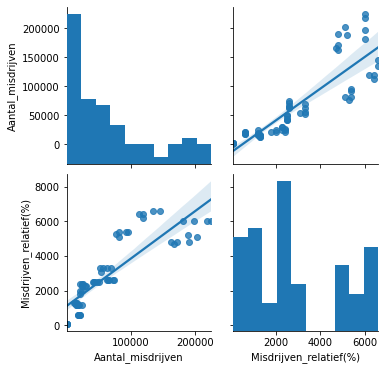

In [216]:
sb.pairplot(totaal_provincie_perjaar, kind="reg")

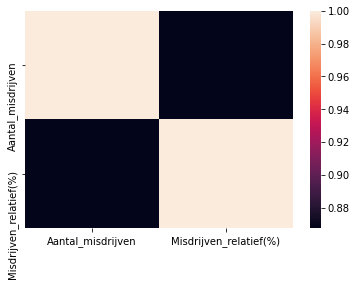

In [218]:
sb.heatmap(totaal_provincie_perjaar.corr())

In [189]:
# Alle Overige records groeperen op Overig
